In [60]:
from abc import abstractmethod
from tabicl.prior.dataset import SCMPrior
from tabicl.prior.prior_config import DEFAULT_FIXED_HP, DEFAULT_SAMPLED_HP

import numpy as np
from scipy.stats import loguniform
import joblib
import math

import torch
import torch.nn.functional as F
from torch import Tensor
from torch.nested import nested_tensor
from torch.utils.data import IterableDataset

from typing import Optional, Tuple, Dict, Any, Union

from mcpfn.prior.dataset import DummyPrior, MCARPrior
    
mcar_prior = MCARPrior(num_missing=10, max_features = 20, max_seq_len=100)

# X, _, _ = mcar_prior.generate_dataset({
#     'prior_type': 'mlp_scm',
#     'num_features': 10,
#     'num_classes': 2,
#     'device': 'cpu',
#     'seq_len': 20,
#     'train_size': 10,
#     'max_features': 20,
#     'min_features': 5,
#     'max_classes': 10,
#     'cat_prob': 1.0,
#     'scale_by_max_features': True,
#     'multiclass_type': 'rank',
#     'multiclass_ordered_prob': 0.2
# })

X, y, d, seq_lens, train_sizes = mcar_prior.get_batch(batch_size = 4)

print(X.shape)
print(seq_lens, train_sizes)

# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.heatmap(torch.isnan(X), cbar=False, cmap='Blues')

torch.Size([4, 2000, 118])
tensor([2000., 2000., 2000., 2000.]) tensor([1990., 1990., 1990., 1990.])


In [59]:
torch.load('data/batch_000000.pt')

RuntimeError: [enforce fail at inline_container.cc:324] . file in archive is not in a subdirectory batch_000000.pt/: batch_000001.pt

In [65]:
from mcpfn.model.bar_distribution import get_bucket_limits, FullSupportBarDistribution

borders = torch.load('borders.pt')

y = torch.randn(100)

mean, std = torch.mean(y), torch.std(y)

y_train_std = std.item() + 1e-20
y_train_mean = mean.item()

y_train = (y - y_train_mean) / y_train_std

bardist = FullSupportBarDistribution(borders = borders)
normalized_bardist = FullSupportBarDistribution(borders = borders * std + mean)

In [67]:
bardist.borders

tensor([-93.0867, -26.1321, -22.6323,  ...,  23.6954,  27.1553,  86.9426])

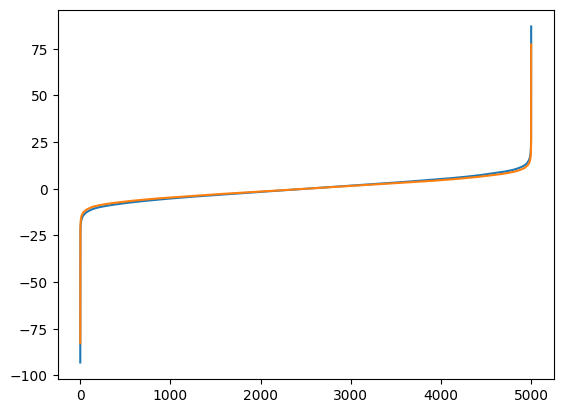

In [72]:
import matplotlib.pyplot as plt

plt.plot(bardist.borders)
plt.plot(normalized_bardist.borders)

In [81]:
y_train.unsqueeze(0)

tensor([[ 2.0074e-01, -4.3655e-01,  1.6527e+00,  9.0075e-01, -1.9251e+00,
          1.6554e+00,  7.4727e-01,  3.0364e-01,  1.5618e+00, -1.3866e+00,
          6.4264e-01,  1.9241e+00,  4.3499e-01, -2.4922e-01, -1.1652e+00,
          2.6176e+00,  4.5972e-01,  1.6928e+00,  4.1489e-01, -8.8834e-02,
          3.1503e+00,  2.9648e-01, -6.2812e-01,  7.7385e-01,  1.1338e+00,
         -1.7390e-01, -1.8383e+00, -1.3864e+00, -9.8848e-02, -1.8397e+00,
          3.1838e-01,  7.7940e-02, -3.7375e-03,  6.4821e-01, -6.8565e-01,
         -6.4260e-01,  8.1026e-01, -8.2524e-01, -7.0349e-01, -1.9773e-01,
         -3.0903e-01, -4.6896e-01, -1.4635e+00, -6.7517e-01,  5.8477e-01,
          2.5487e-03,  1.2064e-01,  3.2227e-01,  3.0442e-01, -1.2604e+00,
          6.9869e-01, -1.1476e+00,  3.5203e-01, -1.1030e+00,  8.3777e-01,
         -6.5952e-01,  9.3750e-01, -8.5054e-01,  3.1865e-01, -2.4822e-01,
          9.5897e-01, -3.3900e-01, -1.9574e-01, -7.3835e-01, -7.5363e-01,
         -3.8466e-01, -1.9810e-01, -1.

In [86]:
logits.unsqueeze(0).permute(1,0,2)

tensor([[[-0.3276, -1.8657, -0.8742,  ..., -0.3727,  0.7198,  0.0544]],

        [[-0.8182,  0.7961,  1.1734,  ..., -1.0454, -2.2515,  2.0311]],

        [[ 1.7532, -0.2757, -0.3792,  ...,  0.4926, -2.6405, -1.3726]],

        ...,

        [[ 0.2543,  1.9337, -0.3983,  ..., -0.4395,  1.2559, -0.6965]],

        [[-1.0539, -0.8043,  1.5859,  ..., -0.8948, -1.1148,  0.2900]],

        [[ 0.4916, -0.7614, -0.0715,  ...,  1.2553, -1.1526,  0.1139]]])

In [102]:
from tabpfn import TabPFNRegressor

reg = TabPFNRegressor()

X,y = torch.randn(100, 20), torch.randn(100)

reg.fit(X,y)

reg.model_

tensor([-93.0867, -26.1321, -22.6323,  ...,  23.6954,  27.1553,  86.9426])


PerFeatureTransformer(
  (encoder): SequentialEncoder(
    (0): RemoveEmptyFeaturesEncoderStep()
    (1): NanHandlingEncoderStep()
    (2): VariableNumFeaturesEncoderStep()
    (3): InputNormalizationEncoderStep()
    (4): VariableNumFeaturesEncoderStep()
    (5): LinearInputEncoderStep(
      (layer): Linear(in_features=4, out_features=192, bias=False)
    )
  )
  (y_encoder): SequentialEncoder(
    (0): NanHandlingEncoderStep()
    (1): LinearInputEncoderStep(
      (layer): Linear(in_features=2, out_features=192, bias=True)
    )
  )
  (transformer_encoder): LayerStack(
    (layers): ModuleList(
      (0-11): 12 x PerFeatureEncoderLayer(
        (self_attn_between_features): MultiHeadAttention()
        (self_attn_between_items): MultiHeadAttention()
        (mlp): MLP(
          (linear1): Linear(in_features=192, out_features=768, bias=False)
          (linear2): Linear(in_features=768, out_features=192, bias=False)
        )
        (layer_norms): ModuleList(
          (0-2): 3 x 

In [156]:
X, y = torch.randn(100, 1, 10), torch.randn(100)
X_test = torch.randn(10, 1, 10)

out = reg.model_.forward(torch.cat([torch.cat([X, torch.zeros_like(X_test)], dim=0), X_test], dim=0), y, single_eval_pos = X.shape[0])

In [157]:
out

tensor([[[4.0166, 2.5648, 2.0397,  ..., 2.1991, 2.4066, 3.9054]],

        [[4.0166, 2.5648, 2.0397,  ..., 2.1991, 2.4066, 3.9054]],

        [[4.0166, 2.5648, 2.0397,  ..., 2.1991, 2.4066, 3.9054]],

        ...,

        [[4.3162, 2.8634, 2.3291,  ..., 2.3070, 2.5205, 4.0783]],

        [[4.5208, 3.0706, 2.5329,  ..., 2.6540, 2.8665, 4.3747]],

        [[4.1786, 2.7237, 2.1918,  ..., 2.3088, 2.5186, 4.0333]]],
       grad_fn=<ViewBackward0>)

In [140]:
reg.normalized_bardist_(out, torch.randn(10, 1, 1))

tensor([[1.0365],
        [1.0158],
        [2.4398],
        [1.0748],
        [1.0473],
        [1.0410],
        [1.0570],
        [1.6131],
        [1.1282],
        [1.2804]], grad_fn=<NegBackward0>)

In [137]:
model = reg.model_

In [145]:
reg.model_

PerFeatureTransformer(
  (encoder): SequentialEncoder(
    (0): RemoveEmptyFeaturesEncoderStep()
    (1): NanHandlingEncoderStep()
    (2): VariableNumFeaturesEncoderStep()
    (3): InputNormalizationEncoderStep()
    (4): VariableNumFeaturesEncoderStep()
    (5): LinearInputEncoderStep(
      (layer): Linear(in_features=4, out_features=192, bias=False)
    )
  )
  (y_encoder): SequentialEncoder(
    (0): NanHandlingEncoderStep()
    (1): LinearInputEncoderStep(
      (layer): Linear(in_features=2, out_features=192, bias=True)
    )
  )
  (transformer_encoder): LayerStack(
    (layers): ModuleList(
      (0-11): 12 x PerFeatureEncoderLayer(
        (self_attn_between_features): MultiHeadAttention()
        (self_attn_between_items): MultiHeadAttention()
        (mlp): MLP(
          (linear1): Linear(in_features=192, out_features=768, bias=False)
          (linear2): Linear(in_features=768, out_features=192, bias=False)
        )
        (layer_norms): ModuleList(
          (0-2): 3 x 

In [164]:
reg.model_.encoder[2].__dict__

{'training': False,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {},
 'in_keys': ['nan_indicators'],
 'out_keys': ['nan_indicators'],
 'normalize_by_used_features': False,
 'num_features': 2,
 'normalize_by_sqrt': True,
 'number_of_used_features_': tensor([[1],
         [1],
         [1],
         [1],
         [1]])}

In [213]:
reg.model_.encoder[4]

{'training': False,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {},
 'in_keys': ('main',),
 'out_keys': ('main',),
 'normalize_by_used_features': True,
 'num_features': 2,
 'normalize_by_sqrt': True,
 'number_of_used_features_': tensor([[2],
         [2],
         [2],
         [2],
         [2]])}

In [172]:
reg.model_.encoder[3].__dict__

{'training': False,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {},
 'in_keys': ('main',),
 'out_keys': ('main',),
 'normalize_on_train_only': True,
 'normalize_to_ranking': False,
 'normalize_x': True,
 'remove_outliers': False,
 'remove_outliers_sigma': 4.0,
 'seed': 0,
 'lower_for_outlier_removal': None,
 'upper_for_outlier_removal': None,
 'mean_for_normalization': tensor([[-0.0344, -0.0156],
         [-0.0527, -0.0624],
         [ 0.0600,  0.0583],
   

In [214]:
encoder_new = SequentialEncoder(
    reg.model_.encoder[4],
    reg.model_.encoder[5]
)

In [215]:
encoder_new

SequentialEncoder(
  (0): VariableNumFeaturesEncoderStep()
  (1): LinearInputEncoderStep(
    (layer): Linear(in_features=4, out_features=192, bias=False)
  )
)

In [218]:
encoder_new[0].__dict__

{'training': False,
 '_parameters': {},
 '_buffers': {},
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_hooks_always_called': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': {},
 'in_keys': ('main',),
 'out_keys': ('main',),
 'normalize_by_used_features': True,
 'num_features': 2,
 'normalize_by_sqrt': True,
 'number_of_used_features_': tensor([[2],
         [2],
         [2],
         [2],
         [2]])}

In [269]:
from tabpfn.model.config import ModelConfig
from tabpfn.model.transformer import PerFeatureTransformer

from tabpfn.model.encoders import (
    LinearInputEncoderStep,
    NanHandlingEncoderStep,
    SequentialEncoder,
    InputNormalizationEncoderStep,
    VariableNumFeaturesEncoderStep,
)

# encoder = SequentialEncoder(
#     VariableNumFeaturesEncoderStep(num_features = 2),
#     InputNormalizationEncoderStep(
#         normalize_on_train_only = True,
#         normalize_to_ranking = False,
#         normalize_x = True,
#         remove_outliers = False,
#         remove_outliers_sigma = 4.0
#     ),
#     LinearInputEncoderStep(
#         input_dim = 4,
#         output_dim = 192,
#         nan_handling = NanHandlingEncoderStep()
#     )
# )

encoder = reg.model_.encoder

encoder[3].mean_for_normalization = torch.zeros_like(encoder[3].mean_for_normalization)
encoder[3].std_for_normalization = torch.ones_like(encoder[3].std_for_normalization)

encoder[1]._buffers = {'feature_means_' : torch.zeros_like(encoder[1]._buffers['feature_means_'])}

config = ModelConfig(
    emsize=192,
    features_per_group=2,
    max_num_classes=10,
    nhead=2,
    remove_duplicate_features=True,
    num_buckets=5000,
    max_num_features=50
)
model = PerFeatureTransformer(config = config, encoder= encoder, n_out = 5000)
model

PerFeatureTransformer(
  (encoder): SequentialEncoder(
    (0): RemoveEmptyFeaturesEncoderStep()
    (1): NanHandlingEncoderStep()
    (2): VariableNumFeaturesEncoderStep()
    (3): InputNormalizationEncoderStep()
    (4): VariableNumFeaturesEncoderStep()
    (5): LinearInputEncoderStep(
      (layer): Linear(in_features=4, out_features=192, bias=False)
    )
  )
  (y_encoder): SequentialEncoder(
    (0): NanHandlingEncoderStep()
    (1): LinearInputEncoderStep(
      (layer): Linear(in_features=2, out_features=192, bias=True)
    )
  )
  (transformer_encoder): LayerStack(
    (layers): ModuleList(
      (0-11): 12 x PerFeatureEncoderLayer(
        (self_attn_between_features): MultiHeadAttention()
        (self_attn_between_items): MultiHeadAttention()
        (mlp): MLP(
          (linear1): Linear(in_features=192, out_features=768, bias=False)
          (linear2): Linear(in_features=768, out_features=192, bias=False)
        )
        (layer_norms): ModuleList(
          (0-2): 3 x 

In [277]:
# save encoder to file
torch.save(encoder, "encoder.pth")

In [278]:
loaded_encoder = torch.load('encoder.pth', weights_only=False)
loaded_encoder

SequentialEncoder(
  (0): RemoveEmptyFeaturesEncoderStep()
  (1): NanHandlingEncoderStep()
  (2): VariableNumFeaturesEncoderStep()
  (3): InputNormalizationEncoderStep()
  (4): VariableNumFeaturesEncoderStep()
  (5): LinearInputEncoderStep(
    (layer): Linear(in_features=4, out_features=192, bias=False)
  )
)

In [1]:
import torch

new_X_train = torch.randn(1, 100, 20)
new_y = torch.randn(1, 100)
new_X_test = torch.randn(1, 10, 20)

# model(torch.cat([new_X_train, new_X_test], dim=0), new_y, single_eval_pos = new_X_train.shape[0])

In [2]:
from mcpfn.model.mcpfn import MCPFN

model = MCPFN(encoder_path = 'src/mcpfn/model/encoder.pth')

In [3]:
out = model(torch.cat([new_X_train, new_X_test], dim=1), new_y)

out.shape

torch.Size([1, 10, 5000])

In [272]:
# Let's try one training step

y_test = torch.randn(10)
print(y_test)

from tqdm import tqdm

step_progress = tqdm(range(50))

# reset model parameters
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

for _ in step_progress:
    optim = torch.optim.AdamW(model.parameters(), lr=0.0001)

    optim.zero_grad()

    out = model(torch.cat([X, X_test], dim=0), y, single_eval_pos = X.shape[0])
    loss = normalized_bardist(out, y_test).mean()
    loss.backward()

    optim.step()
    
    step_progress.set_description(f"Loss: {loss.item():.4f}")

tensor([-0.5689, -1.1021, -0.4471,  0.9601, -0.5685, -1.2178,  1.5860,  0.0055,
         0.3445,  0.1032])


Loss: -4.3115: 100%|██████████| 50/50 [00:11<00:00,  4.52it/s]


In [264]:
out = model(torch.cat([X, X_test], dim=0), y, single_eval_pos = X.shape[0])

In [265]:
print(y_test)
normalized_bardist.mean(out).flatten()

tensor([-0.4668,  0.2356,  0.6985, -1.1044, -0.2697,  0.9062,  1.1155, -0.3559,
        -0.6988,  1.0316])


tensor([-0.2513,  0.0882,  0.3636, -0.5889, -0.1727,  0.5199,  0.4821, -0.2265,
        -0.3853,  0.3796], grad_fn=<ViewBackward0>)

In [62]:
from mcpfn.model.bar_distribution import FullSupportBarDistribution
from torch import Tensor
import torch.nn as nn

class OneHotAndLinear(nn.Linear):
    """Combines one-hot encoding and linear projection in a single efficient operation
    to convert categorical indices to embeddings.

    Parameters
    ----------
    num_classes : int
        Number of distinct categories for one-hot encoding

    embed_dim : int
        Output embedding dimension
    """

    def __init__(self, num_classes: int, embed_dim: int):
        super().__init__(num_classes, embed_dim)
        self.num_classes = num_classes
        self.embed_dim = embed_dim

    def forward(self, src: Tensor) -> Tensor:
        """Transform integer indices to dense embeddings.

        Parameters
        ----------
        src : Tensor
            Integer tensor of shape (batch_size, sequence_length) containing category indices

        Returns
        -------
        Tensor
            Embedded representation of shape (batch_size, sequence_length, embed_dim)
        """
        # Convert indices to one-hot vectors and apply linear projection
        one_hot = F.one_hot(src.long(), self.num_classes).to(torch.float32)
        return F.linear(one_hot, self.weight, self.bias)
    
class OneHotAndLinearBarDistribution(nn.Module):
    def __init__(self, borders: Tensor, embed_dim: int):
        super().__init__()
        self.bar_distribution = FullSupportBarDistribution(borders = borders)
        self.one_hot_and_linear = OneHotAndLinear(num_classes = len(borders) + 1, embed_dim = embed_dim)
        
    def forward(self, src: Tensor) -> Tensor:
        """Transform float values to dense embeddings using the BarDistribution.

        Parameters
        ----------
        src : Tensor
            Float tensor of shape (batch_size, sequence_length) containing values to embed

        Returns
        -------
        Tensor
            Embedded representation of shape (batch_size, sequence_length, embed_dim)
        """
        border_inds = self.bar_distribution.map_to_bucket_idx(src)
        return self.one_hot_and_linear(border_inds)

In [76]:
torch.arange(100 + 1).float() * 10_000

tensor([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,   60000.,
          70000.,   80000.,   90000.,  100000.,  110000.,  120000.,  130000.,
         140000.,  150000.,  160000.,  170000.,  180000.,  190000.,  200000.,
         210000.,  220000.,  230000.,  240000.,  250000.,  260000.,  270000.,
         280000.,  290000.,  300000.,  310000.,  320000.,  330000.,  340000.,
         350000.,  360000.,  370000.,  380000.,  390000.,  400000.,  410000.,
         420000.,  430000.,  440000.,  450000.,  460000.,  470000.,  480000.,
         490000.,  500000.,  510000.,  520000.,  530000.,  540000.,  550000.,
         560000.,  570000.,  580000.,  590000.,  600000.,  610000.,  620000.,
         630000.,  640000.,  650000.,  660000.,  670000.,  680000.,  690000.,
         700000.,  710000.,  720000.,  730000.,  740000.,  750000.,  760000.,
         770000.,  780000.,  790000.,  800000.,  810000.,  820000.,  830000.,
         840000.,  850000.,  860000.,  870000.,  880000.,  89000

In [75]:
embed = OneHotAndLinearBarDistribution(borders = get_bucket_limits(num_outputs = 10, ys = y[0]), embed_dim = 5)
embed.forward(y)

tensor([[[ 0.3768,  0.4734,  0.3515,  0.1267,  0.1809],
         [ 0.0697, -0.0408,  0.0008, -0.0110,  0.3711],
         [ 0.0934,  0.2529, -0.1078,  0.3877,  0.1241],
         ...,
         [ 0.2729, -0.0564,  0.2694,  0.2176,  0.2458],
         [ 0.0697, -0.0408,  0.0008, -0.0110,  0.3711],
         [ 0.0286,  0.1849,  0.2529,  0.0896,  0.2210]],

        [[ 0.3768,  0.4734,  0.3515,  0.1267,  0.1809],
         [ 0.1820,  0.2355,  0.3742,  0.4739,  0.3579],
         [ 0.2617,  0.3889,  0.1455,  0.3633,  0.1481],
         ...,
         [ 0.2617,  0.3889,  0.1455,  0.3633,  0.1481],
         [ 0.2617,  0.3889,  0.1455,  0.3633,  0.1481],
         [ 0.3480,  0.0918,  0.2185,  0.4270,  0.5327]],

        [[ 0.3480,  0.0918,  0.2185,  0.4270,  0.5327],
         [ 0.2617,  0.3889,  0.1455,  0.3633,  0.1481],
         [-0.0122,  0.1016,  0.1509,  0.2821,  0.3547],
         ...,
         [ 0.3480,  0.0918,  0.2185,  0.4270,  0.5327],
         [ 0.2729, -0.0564,  0.2694,  0.2176,  0.2458],
  

In [19]:
y

torch.float32

In [20]:
embed.forward(y)

RuntimeError: Class values must be non-negative.

In [166]:
logits = torch.randn(4, 2000, 100)

In [57]:
torch.load('borders.pt')

tensor([-93.0867, -26.1321, -22.6323,  ...,  23.6954,  27.1553,  86.9426])

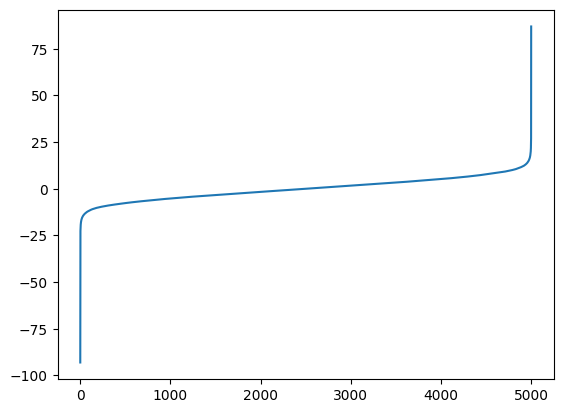

In [56]:
import torch

torch.load('borders.pt')

import matplotlib.pyplot as plt

plt.plot(torch.load('borders.pt'))

In [150]:
get_bucket_limits(num_outputs = 100, ys = y[0])

tensor([-3.8737e+00, -2.4309e+00, -2.0873e+00, -1.9186e+00, -1.7537e+00,
        -1.6525e+00, -1.5780e+00, -1.4858e+00, -1.3852e+00, -1.3385e+00,
        -1.2987e+00, -1.2466e+00, -1.2169e+00, -1.1501e+00, -1.0999e+00,
        -1.0378e+00, -1.0113e+00, -9.6897e-01, -9.2145e-01, -8.8394e-01,
        -8.4370e-01, -8.0649e-01, -7.7390e-01, -7.4602e-01, -7.1809e-01,
        -6.7251e-01, -6.4145e-01, -6.1843e-01, -5.9119e-01, -5.6030e-01,
        -5.3457e-01, -5.0215e-01, -4.7838e-01, -4.5791e-01, -4.3009e-01,
        -4.1545e-01, -3.8019e-01, -3.5528e-01, -3.3076e-01, -3.0420e-01,
        -2.7439e-01, -2.4172e-01, -2.2195e-01, -1.9647e-01, -1.7418e-01,
        -1.4726e-01, -1.2405e-01, -9.5777e-02, -7.5509e-02, -5.1924e-02,
        -3.1530e-02, -3.8033e-03,  1.9635e-02,  4.3842e-02,  7.4794e-02,
         9.6513e-02,  1.2021e-01,  1.6955e-01,  1.9146e-01,  2.2836e-01,
         2.6040e-01,  2.8865e-01,  3.1268e-01,  3.3820e-01,  3.6411e-01,
         3.8537e-01,  4.1810e-01,  4.4873e-01,  4.7

In [ ]:
# Now we just need to train on this data

In [151]:
import torch

batch1 = torch.load('/Users/jfeit/tabular/mcpfn/prior/batch_000000.pt')

In [154]:
batch1['X'].isnan().sum()

tensor(760)

In [48]:
batch1['X']

torch.Size([26227712])

In [46]:
batch1['y'].shape

torch.Size([512, 1024])

In [43]:
batch1['d']

tensor([ 13,  13,  13,  13,  36,  36,  36,  36,  37,  37,  37,  37,  47,  47,
         47,  47,  42,  42,  42,  42,  97,  97,  97,  97,  37,  37,  37,  37,
         75,  75,  75,  75,  43,  43,  43,  43,  70,  70,  70,  70,  73,  74,
         74,  74,  55,  55,  55,  55,  46,  46,  46,  46,  94,  94,  94,  94,
         18,  18,  18,  18,  60,  60,  60,  60,  44,  44,  44,  44,  83,  83,
         83,  83,  47,  47,  47,  47,  36,  36,  36,  36,  20,  20,  20,  20,
         30,  30,  30,  30,  43,  43,  43,  43,  61,  61,  61,  61,  33,  33,
         33,  33,   5,   5,   5,   5, 100, 100, 100, 100,  39,  39,  39,  39,
          4,   4,   4,   4,  79,  79,  79,  79,  97,  97,  97,  97,  80,  80,
         80,  80,  62,  62,  62,  62,  10,  10,  10,  10,  52,  52,  52,  52,
         82,  82,  82,  82,   8,   8,   8,   8,  58,  58,  58,  58,  78,  78,
         78,  78,  12,  12,  12,  12,  72,  72,  72,  72,  80,  80,  80,  80,
         97,  99,  99,  99,  29,  29,  29,  29,  55,  55,  55,  

In [6]:
from torch import nn
import torch.nn.functional as F

In [18]:
y_train = torch.randint(0, 10, (1, 1900))

one_hot = F.one_hot(y_train.long(), 10).to(torch.float32)

lin = nn.Linear(10, 512)

lin(one_hot)

tensor([[[-0.3267,  0.5456, -0.2666,  ...,  0.1564,  0.1221, -0.0616],
         [-0.3267,  0.5456, -0.2666,  ...,  0.1564,  0.1221, -0.0616],
         [-0.1359,  0.0529, -0.2173,  ..., -0.2137, -0.2599,  0.2424],
         ...,
         [-0.1359,  0.0529, -0.2173,  ..., -0.2137, -0.2599,  0.2424],
         [-0.0175,  0.3406, -0.1104,  ..., -0.1093,  0.2604,  0.2327],
         [-0.0101,  0.4443,  0.0548,  ...,  0.0775, -0.0382,  0.2546]]],
       grad_fn=<ViewBackward0>)

In [13]:
one_hot.shape

torch.Size([1, 1900, 10])

In [23]:
batch1 = torch.load('prior/batch_000000.pt')

In [37]:
batch1['X'].shape[0] / (4 * 2000)

20.0

In [33]:
batch1

{'X': tensor([ 1.4873,  0.9007, -2.1055,  ...,  0.5313,  2.5650,  0.4879]),
 'y': tensor([[ 1.9269,  1.4873,  0.9007,  ...,  0.3189,  0.7836,  0.3841],
         [-0.9928, -0.2558, -0.9586,  ...,  1.8776, -0.0146, -1.3936],
         [-2.4740,  1.3030, -0.5953,  ..., -1.1701, -0.3380, -1.2186],
         [-0.4628,  0.1498,  0.6902,  ...,  0.4652,  0.0260, -1.0705]]),
 'd': tensor([20, 20, 20, 20]),
 'seq_lens': tensor([2000., 2000., 2000., 2000.]),
 'train_sizes': tensor([1990., 1990., 1990., 1990.]),
 'batch_size': 4}

In [43]:
X = batch1['X'].reshape((4, 2000, 20))

In [47]:
X1 = X[0:1, :]

# Compute mean along dim=2 (last dimension), ignoring NaNs
mean_vals = torch.nanmean(X1, dim=2, keepdim=True)  # shape: [1, 2000, 1]

# Find the NaNs
nan_mask = torch.isnan(X1)  # shape: [1, 2000, 20]

# Expand mean_vals to match x's shape for indexing
mean_vals_expanded = mean_vals.expand_as(X1)

# Replace NaNs with corresponding mean values
X1[nan_mask] = mean_vals_expanded[nan_mask]

In [54]:
batch1['y'][0,1990:]

tensor([ 0.0186,  0.6454,  2.6221,  0.0877, -2.3692, -1.5197, -0.4666,  0.3189,
         0.7836,  0.3841])

In [48]:
X1.isnan().sum()

tensor(0)

In [22]:
y_train = torch.randn(1,1900)

y_train = y_train.unsqueeze(2)

lin = nn.Linear(1, 512)

lin(y_train)

torch.Size([1, 1900, 1])


tensor([[[ 0.3893,  1.0122, -0.0252,  ...,  0.0104,  0.6351,  0.7693],
         [ 0.4426,  0.9237,  0.0062,  ...,  0.0411,  0.7069,  0.7064],
         [ 0.3873,  1.0155, -0.0263,  ...,  0.0092,  0.6325,  0.7716],
         ...,
         [ 0.0725,  1.5377, -0.2118,  ..., -0.1722,  0.2090,  1.1428],
         [ 0.2951,  1.1684, -0.0807,  ..., -0.0439,  0.5084,  0.8803],
         [ 0.9194,  0.1325,  0.2872,  ...,  0.3160,  1.3485,  0.1440]]],
       grad_fn=<ViewBackward0>)

In [ ]:
# Load diabetes dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tabpfn import TabPFNRegressor

model = TabPFNRegressor(device="cpu")

model.fit(X_train, y_train)
model.bardist_.borders.shape

tensor([-93.0867, -26.1321, -22.6323,  ...,  23.6954,  27.1553,  86.9426])


/Users/jfeit/tabular/tabpfn/TabPFN/src/tabpfn/regressor.py:489: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


tensor([-93.0867, -26.1321, -22.6323,  ...,  23.6954,  27.1553,  86.9426])

In [92]:
# load breast cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = TabPFNClassifier()

model.fit(X_train, y_train)

/Users/jfeit/tabular/.venv/lib/python3.10/site-packages/tabpfn/classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


TabPFNClassifier()

In [2]:
model.bardist_.borders.shape

torch.Size([5001])

In [2]:
from tabpfn import TabPFNRegressor, TabPFNClassifier

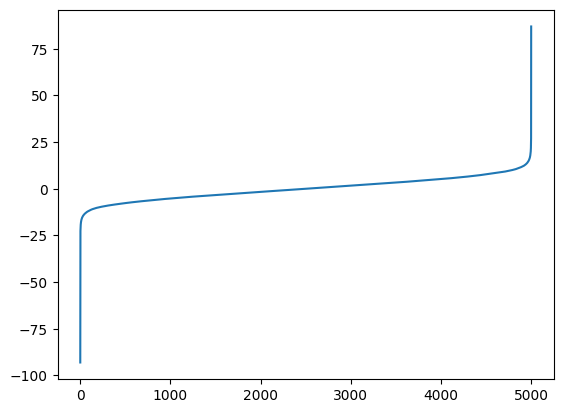

In [105]:
import matplotlib.pyplot as plt

plt.plot(model.bardist_.borders)

In [111]:
model = TabPFNRegressor()

In [112]:
model.__dict__

{'n_estimators': 8,
 'categorical_features_indices': None,
 'softmax_temperature': 0.9,
 'average_before_softmax': False,
 'model_path': 'auto',
 'device': 'auto',
 'ignore_pretraining_limits': False,
 'inference_precision': 'auto',
 'fit_mode': 'fit_preprocessors',
 'memory_saving_mode': 'auto',
 'random_state': 0,
 'n_jobs': -1,
 'inference_config': None}

In [110]:
from tabpfn import TabPFNRegressor

In [109]:
model.bardist_.borders

tensor([-93.0867, -26.1321, -22.6323,  ...,  23.6954,  27.1553,  86.9426])

In [29]:
import numpy as np

def create_train_test_sets(X):
    # Get missing indices in X
    missing_indices = np.where(np.isnan(X))
    
    non_missing_indices = np.where(~np.isnan(X))
    
    train_X = np.zeros((len(non_missing_indices[0]), X.shape[0] + X.shape[1] - 2))
    train_y = np.zeros(len(non_missing_indices[0]))
    test_X = np.zeros((len(missing_indices[0]), X.shape[0] + X.shape[1] - 2))
    test_y = np.zeros(len(missing_indices[0]))
    
    for k, (i,j) in enumerate(zip(non_missing_indices[0], non_missing_indices[1])):
        # Get row without j-th column
        row = np.delete(X[i,:], j)
        # Get column without i-th row
        col = np.delete(X[:,j], i)
        
        # Create train set
        train_X[k,:] = np.concatenate((row, col))
        train_y[k] = X[i,j]
        
    
    for k, (i,j) in enumerate(zip(missing_indices[0], missing_indices[1])):
        # Get row without j-th column
        row = np.delete(X[i,:], j)
        # Get column without i-th row
        col = np.delete(X[:,j], i)
        
        # Create train set
        test_X[k,:] = np.concatenate((row, col))
        test_y[k] = np.nan
        
    return train_X, train_y, test_X, test_y
    
X = np.array([[1, 3, 5], [7, np.nan, 6], [-1, 2, np.nan]])
train_X, train_y, test_X, test_y = create_train_test_sets(X)

print(train_X)
print(train_y)
print(test_X)
print(test_y)

[[ 3.  5.  7. -1.]
 [ 1.  5. nan  2.]
 [ 1.  3.  6. nan]
 [nan  6.  1. -1.]
 [ 7. nan  5. nan]
 [ 2. nan  1.  7.]
 [-1. nan  3. nan]]
[ 1.  3.  5.  7.  6. -1.  2.]
[[ 7.  6.  3.  2.]
 [-1.  2.  5.  6.]]
[nan nan]


In [19]:
import torch

In [20]:
X_tnsr = torch.from_numpy(X)

tensor([[ 1.,  3.,  5.],
        [ 7., nan,  6.],
        [-1.,  2., nan]], dtype=torch.float64)